# PART 1 - Modeling and Training a CNN classifier from Scratch

In [28]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras import losses, layers, models, optimizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [52]:
images = []
labels = []
classes = []

input_path = "indoorCVPR_09/Images/"
label = 0
for folder in os.listdir(input_path):
    folder_path = os.path.join(input_path, folder)
    if len(os.listdir(folder_path)) >= 300:
        classes.append(folder)
        print(f'{len(os.listdir(folder_path))} - {folder}')
        for i in range(300):
            image_filename = os.listdir(folder_path)[i]
            image_path = os.path.join(folder_path, image_filename)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, (32,32))
                images.append(image)
                labels.append([label])
        label += 1

X = np.array(images)
y = LabelEncoder().fit_transform(np.array(labels))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/6, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
                



print()

print("y unique values:", set(y))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



608 - airport_inside
405 - bakery
604 - bar
662 - bedroom
380 - bookstore
515 - casino
346 - corridor
457 - inside_subway
734 - kitchen
706 - livingroom
384 - pantry
513 - restaurant
539 - subway
347 - toystore
506 - warehouse

y unique values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
X_train shape: (2998, 32, 32, 3)
y_train shape: (2998,)
X_val shape: (750, 32, 32, 3)
y_val shape: (750,)
X_test shape: (750, 32, 32, 3)
y_test shape: (750,)


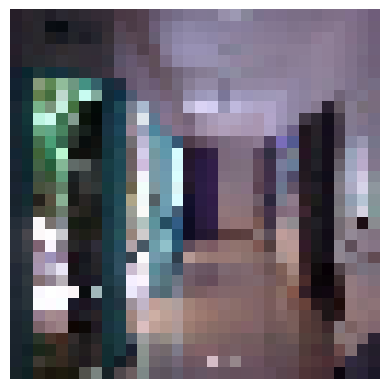

In [3]:
plt.imshow(images[2024])
plt.axis("off")
plt.show()

In [4]:
def create_CNN_model(input_shape=(32,32,3), activation='relu', dropout=False, dropout_value=0.1):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    if dropout: model.add(layers.Dropout(dropout_value))
    model.add(layers.Conv2D(64, (3, 3), activation=activation))
    model.add(layers.MaxPooling2D((2, 2)))
    if dropout: model.add(layers.Dropout(dropout_value))
    model.add(layers.Conv2D(128, (3, 3), activation=activation))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation))
    model.add(layers.Dense(15, activation='softmax'))
    return model

In [5]:
CNN_model = create_CNN_model(input_shape=(32,32,3), activation='relu')
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [6]:
def train_CNN_model(model, X_train, y_train, X_val, y_val, learning_rate, batch_size):
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
    return history

def get_accuracy(model, X_test, y_test):
    _, accuracy = model.evaluate(X_test, y_test, verbose = 0)
    return accuracy

def plot_history(history):
    plt.subplots(figsize=(15, 5))
    plt.subplot(1,2,1) 
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend() 
    plt.subplot(1,2,2) 
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()


EXPERIMENT 1:
Learning Rate=0.001, Batch Size=16


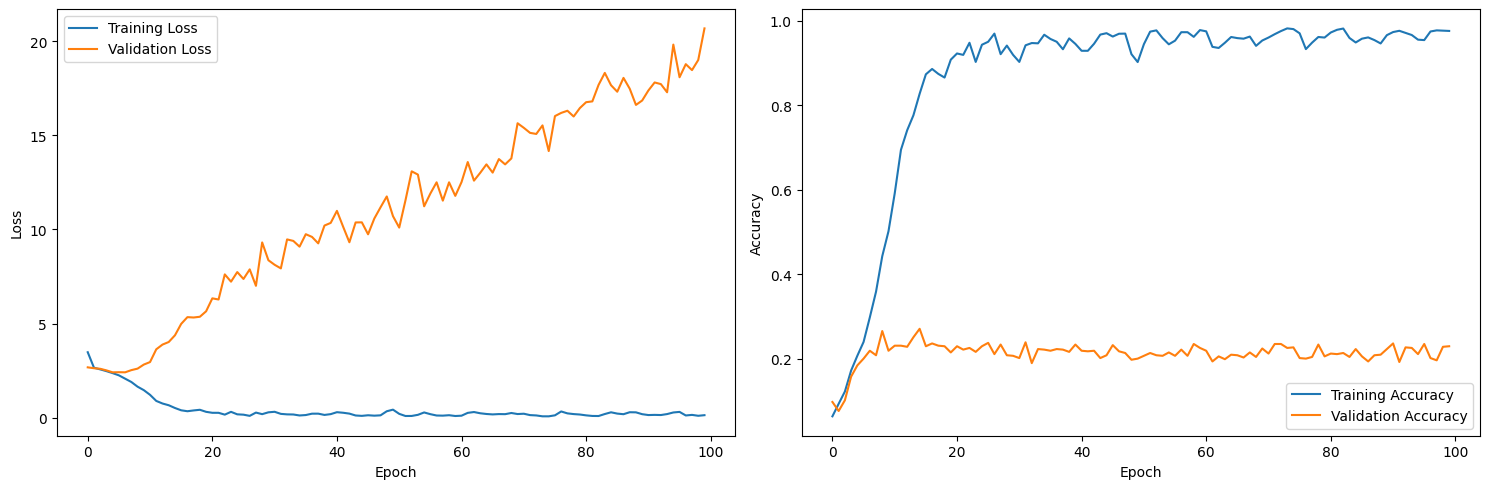

Testing Accuracy: 20.80%



In [12]:
learning_rate = 0.001
batch_size = 16
CNN_model1 = create_CNN_model()
print(f'\nEXPERIMENT 1:\nLearning Rate={learning_rate}, Batch Size={batch_size}')
plot_history(train_CNN_model(CNN_model1, X_train, y_train, X_val, y_val, learning_rate, batch_size))
print(f"Testing Accuracy: {(get_accuracy(CNN_model1, X_test, y_test)*100):.2f}%\n")


EXPERIMENT 2:
Learning Rate=0.0015, Batch Size=16


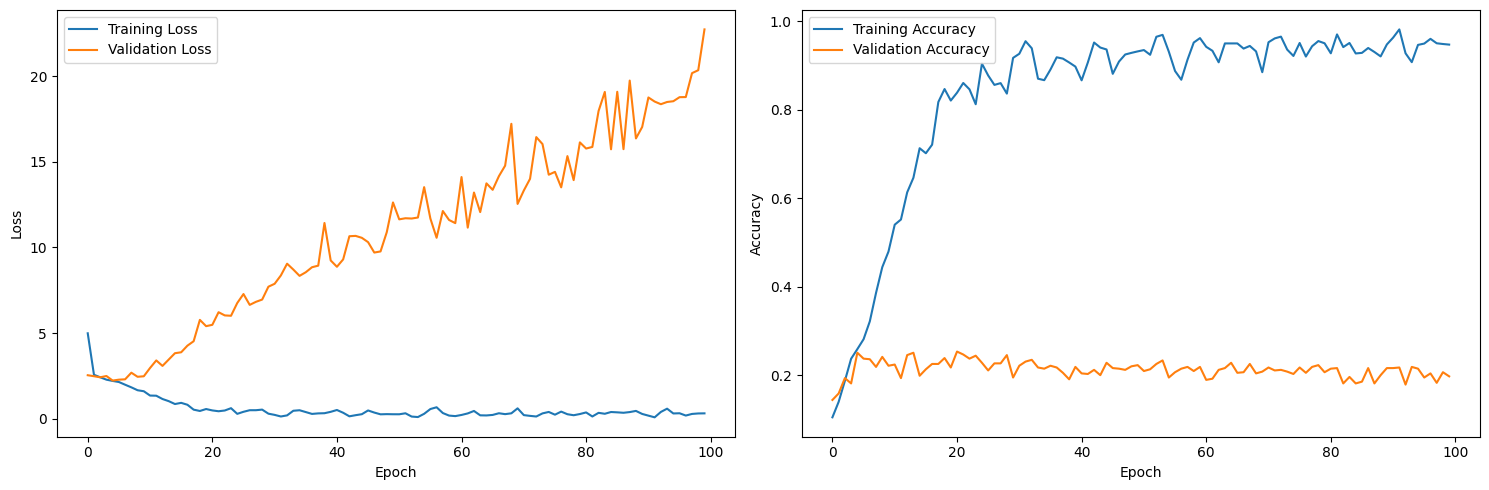

Testing Accuracy: 19.07%



In [10]:
learning_rate = 0.0015
batch_size = 16
CNN_model2 = create_CNN_model()
print(f'\nEXPERIMENT 2:\nLearning Rate={learning_rate}, Batch Size={batch_size}')
plot_history(train_CNN_model(CNN_model2, X_train, y_train, X_val, y_val, learning_rate, batch_size))
print(f"Testing Accuracy: {(get_accuracy(CNN_model2, X_test, y_test)*100):.2f}%\n")


EXPERIMENT 3:
Learning Rate=0.002, Batch Size=16


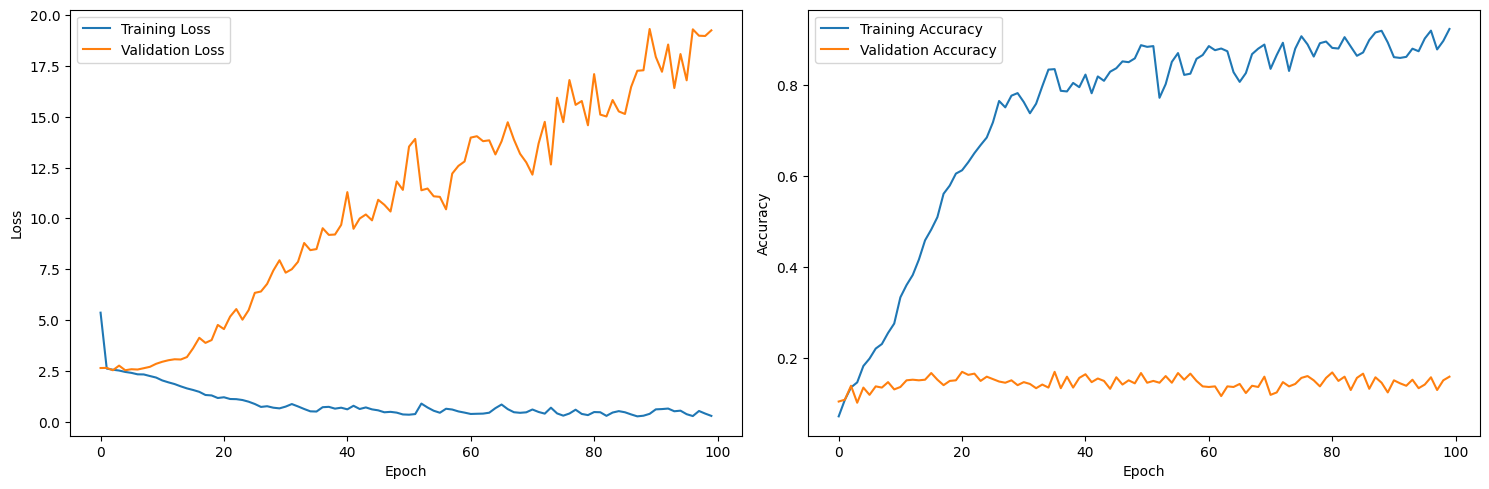

Testing Accuracy: 14.40%



In [11]:
learning_rate = 0.002
batch_size = 16
CNN_model3 = create_CNN_model()
print(f'\nEXPERIMENT 3:\nLearning Rate={learning_rate}, Batch Size={batch_size}')
plot_history(train_CNN_model(CNN_model3, X_train, y_train, X_val, y_val, learning_rate, batch_size))
print(f"Testing Accuracy: {(get_accuracy(CNN_model3, X_test, y_test)*100):.2f}%\n")


EXPERIMENT 4:
Learning Rate=0.001, Batch Size=32


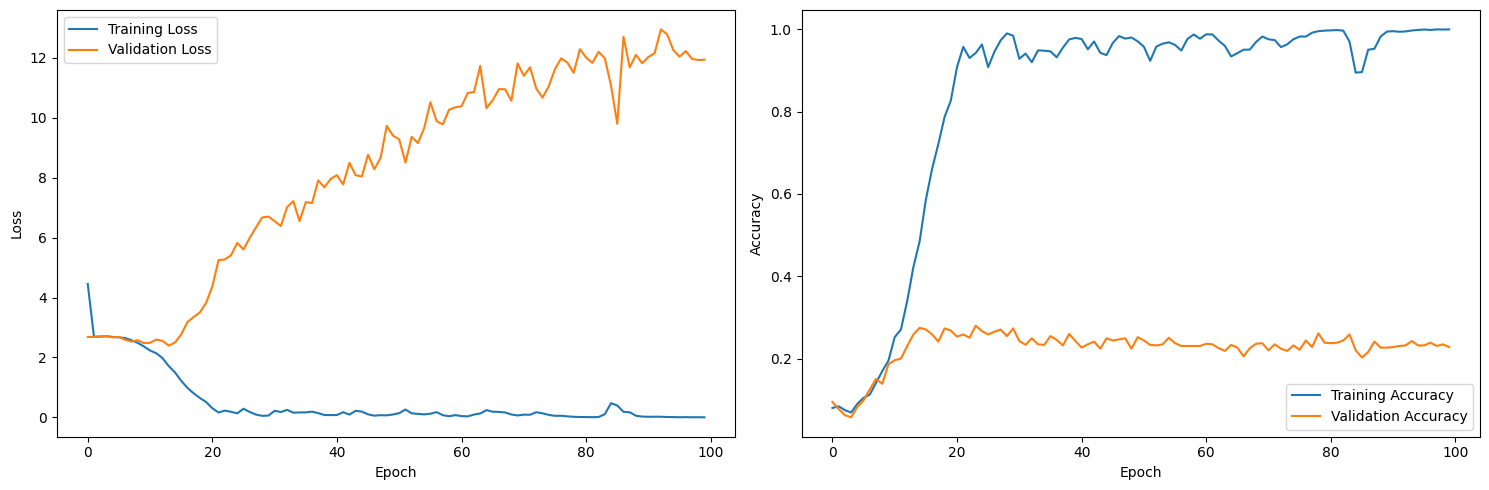

Testing Accuracy: 20.67%



In [13]:
learning_rate = 0.001
batch_size = 32
CNN_model4 = create_CNN_model()
print(f'\nEXPERIMENT 4:\nLearning Rate={learning_rate}, Batch Size={batch_size}')
plot_history(train_CNN_model(CNN_model4, X_train, y_train, X_val, y_val, learning_rate, batch_size))
print(f"Testing Accuracy: {(get_accuracy(CNN_model4, X_test, y_test)*100):.2f}%\n")


EXPERIMENT 5:
Learning Rate=0.0015, Batch Size=32


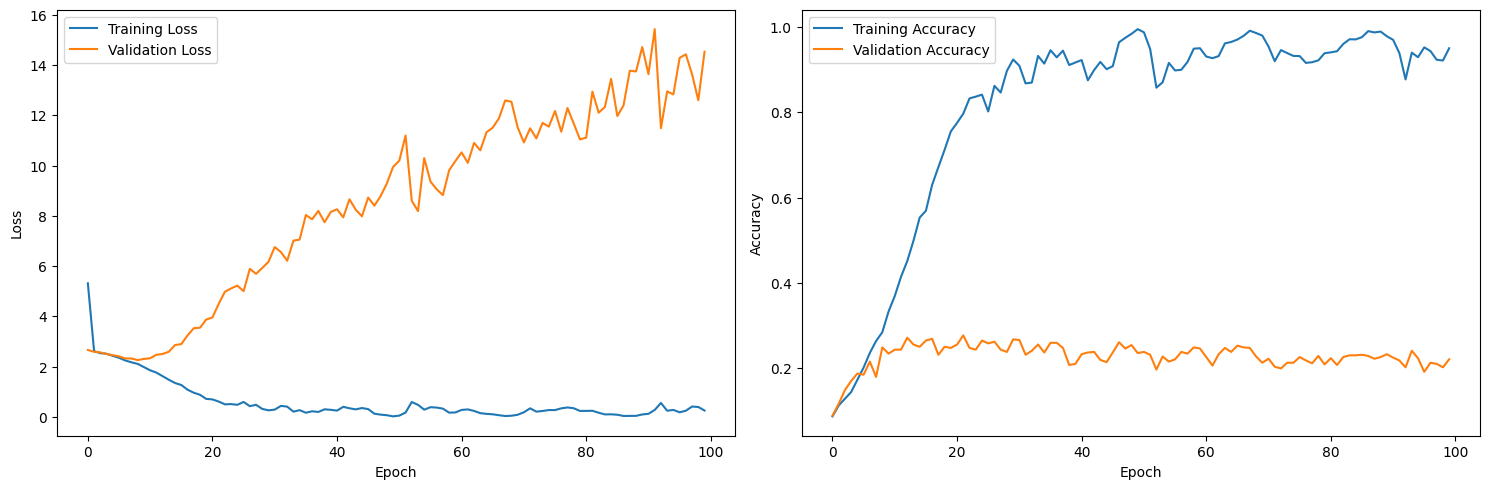

Testing Accuracy: 20.67%



In [14]:
learning_rate = 0.0015
batch_size = 32
CNN_model5 = create_CNN_model()
print(f'\nEXPERIMENT 5:\nLearning Rate={learning_rate}, Batch Size={batch_size}')
plot_history(train_CNN_model(CNN_model5, X_train, y_train, X_val, y_val, learning_rate, batch_size))
print(f"Testing Accuracy: {(get_accuracy(CNN_model5, X_test, y_test)*100):.2f}%\n")


EXPERIMENT 6:
Learning Rate=0.002, Batch Size=32


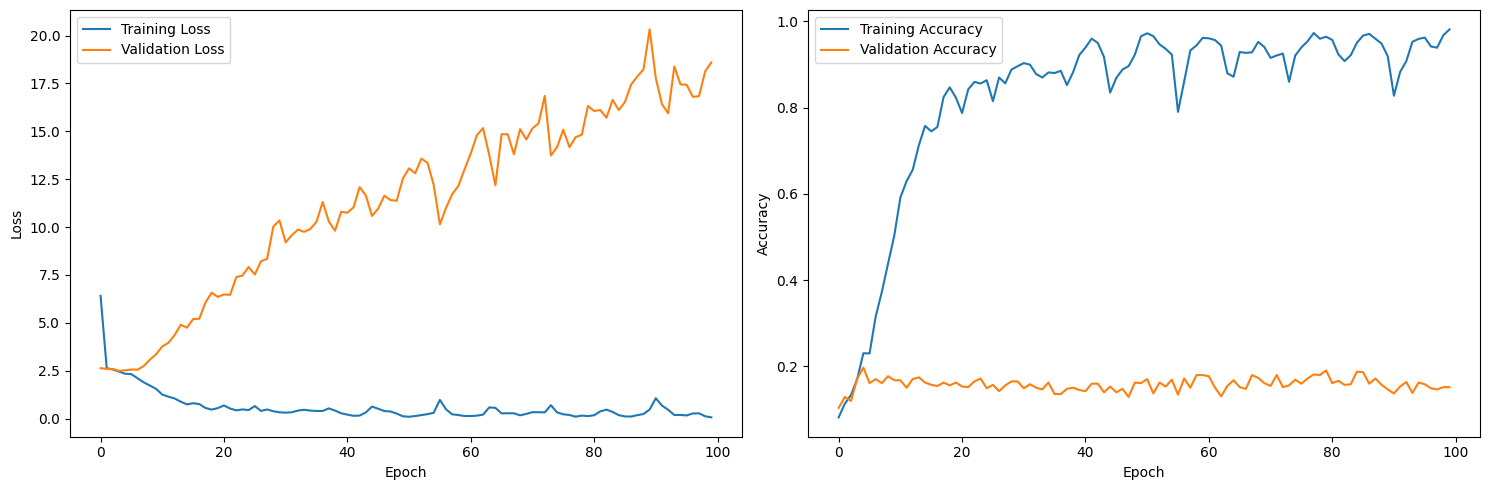

Testing Accuracy: 16.93%



In [15]:
learning_rate = 0.002
batch_size = 32
CNN_model6 = create_CNN_model()
print(f'\nEXPERIMENT 6:\nLearning Rate={learning_rate}, Batch Size={batch_size}')
plot_history(train_CNN_model(CNN_model6, X_train, y_train, X_val, y_val, learning_rate, batch_size))
print(f"Testing Accuracy: {(get_accuracy(CNN_model6, X_test, y_test)*100):.2f}%\n")


EXPERIMENT 7:
Dropout=0.1


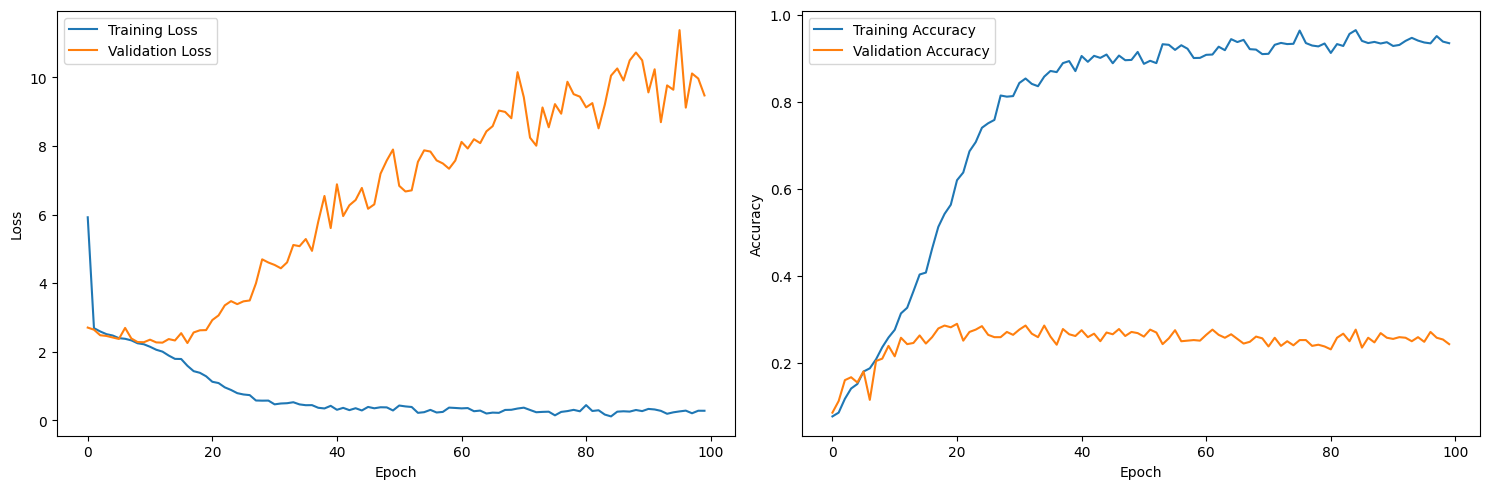

Testing Accuracy: 23.87%



In [18]:
dropout_value = 0.10

# Choosing the values from the model which gives best accuracy above
learning_rate , batch_size = 0.001, 16

CNN_model7 = create_CNN_model(dropout=True, dropout_value=dropout_value)
print(f'\nEXPERIMENT 7:\nDropout={dropout_value}')
plot_history(train_CNN_model(CNN_model7, X_train, y_train, X_val, y_val, learning_rate, batch_size))
print(f"Testing Accuracy: {(get_accuracy(CNN_model7, X_test, y_test)*100):.2f}%\n")


EXPERIMENT 8:
Dropout=0.25


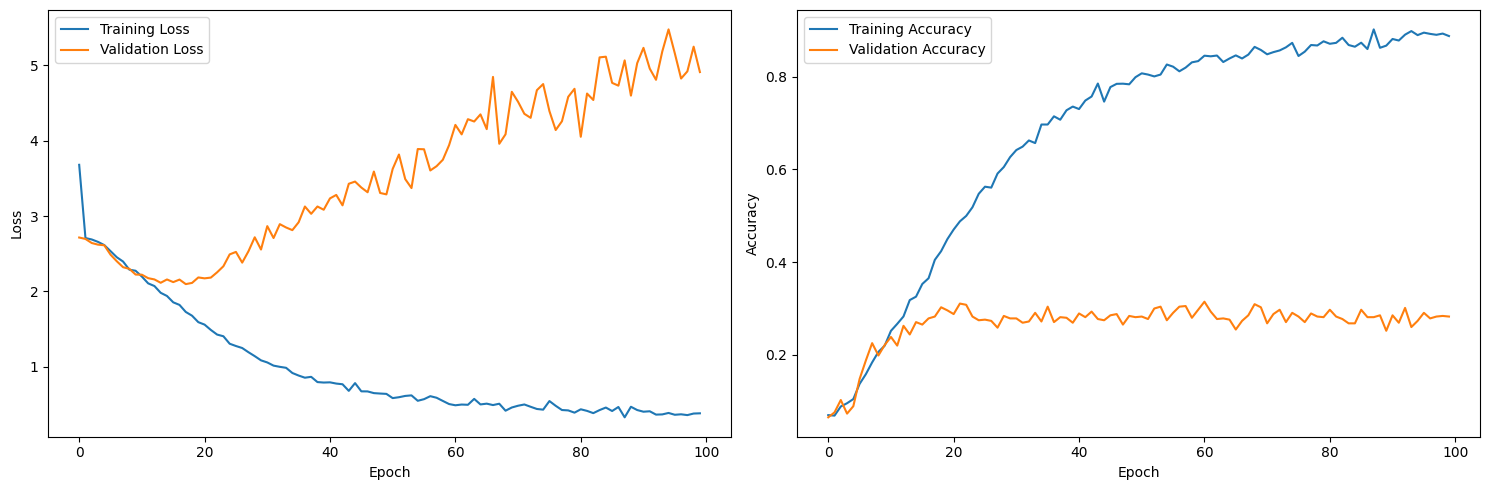

Testing Accuracy: 27.20%



In [10]:
dropout_value = 0.25
learning_rate , batch_size = 0.001, 16

CNN_model8 = create_CNN_model(dropout=True, dropout_value=dropout_value)
print(f'\nEXPERIMENT 8:\nDropout={dropout_value}')
plot_history(train_CNN_model(CNN_model8, X_train, y_train, X_val, y_val, learning_rate, batch_size))
print(f"Testing Accuracy: {(get_accuracy(CNN_model8, X_test, y_test)*100):.2f}%\n")


EXPERIMENT 9:
Dropout=0.05


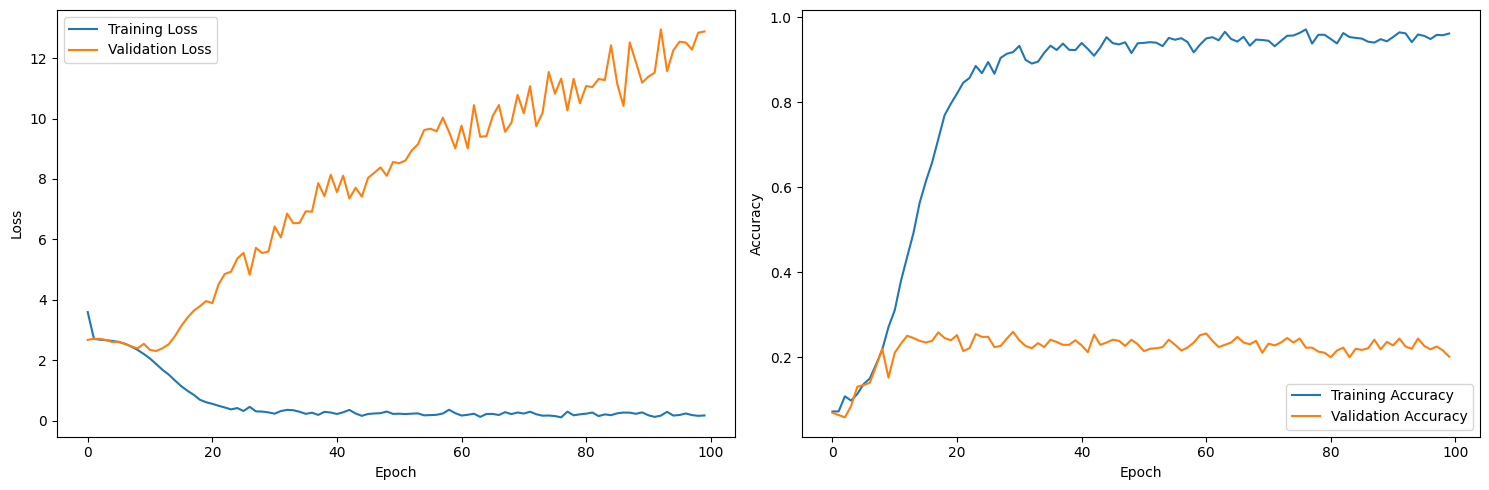

Testing Accuracy: 23.33%



In [22]:
dropout_value = 0.05
learning_rate , batch_size = 0.001, 16

CNN_model9 = create_CNN_model(dropout=True, dropout_value=dropout_value)
print(f'\nEXPERIMENT 9:\nDropout={dropout_value}')
plot_history(train_CNN_model(CNN_model9, X_train, y_train, X_val, y_val, learning_rate, batch_size))
print(f"Testing Accuracy: {(get_accuracy(CNN_model9, X_test, y_test)*100):.2f}%\n")


EXPERIMENT 10:
Dropout=0.15


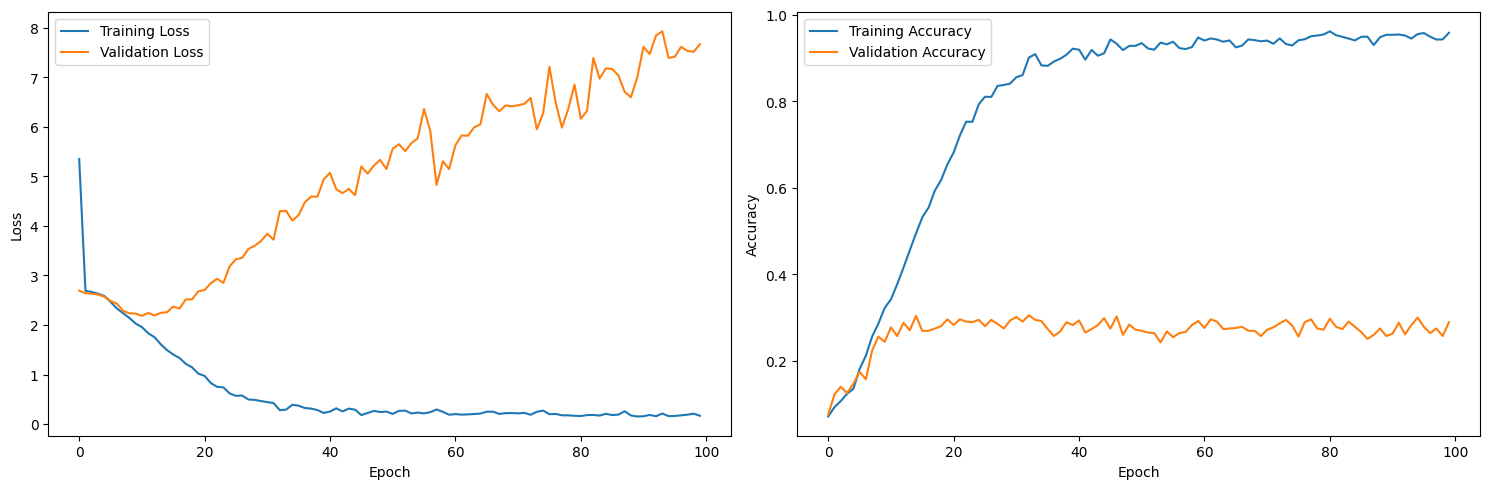

Testing Accuracy: 25.60%



In [21]:
dropout_value = 0.15
learning_rate , batch_size = 0.001, 32

CNN_model10 = create_CNN_model(dropout=True, dropout_value=dropout_value)
print(f'\nEXPERIMENT 10:\nDropout={dropout_value}')
plot_history(train_CNN_model(CNN_model10, X_train, y_train, X_val, y_val, learning_rate, batch_size))
print(f"Testing Accuracy: {(get_accuracy(CNN_model10, X_test, y_test)*100):.2f}%\n")

In [59]:
prediction = CNN_model8.predict(X_test, steps = 20)
y_pred = np.argmax(prediction, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

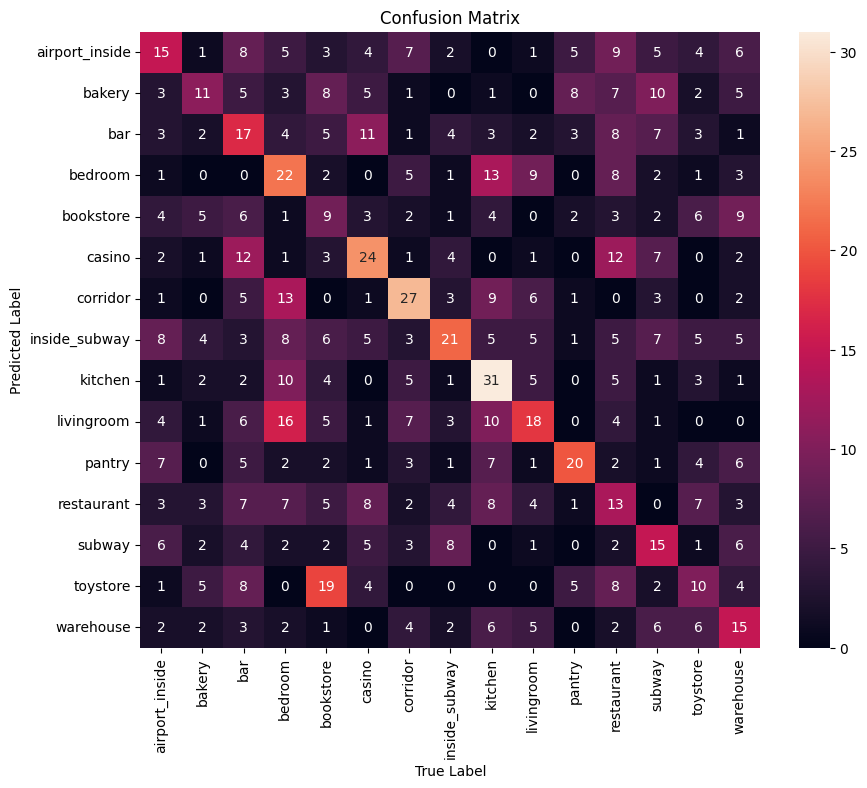

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes,yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

# PART 2 - Transfer Learning with CNNs

In [66]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)

base_model.trainable = False

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [67]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(15, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)



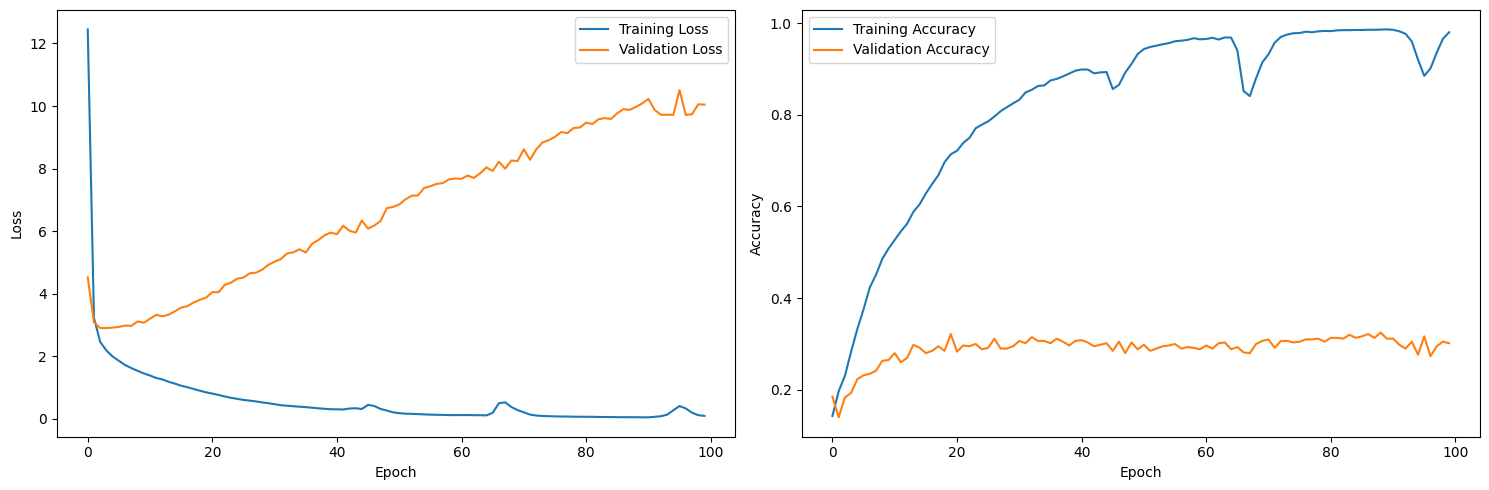

In [69]:
plot_history(model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=0))

In [78]:
print(f"Testing Accuracy: {(get_accuracy(model, X_test, y_test)*100):.2f}%\n")

Testing Accuracy: 29.07%



In [74]:
base_model_2 = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
base_model_2.trainable = True

# train last two convolutional layers and FC layers
for layer in base_model_2.layers[:16]:
    if layer != base_model_2.layers[16] and layer != base_model_2.layers[17]:
        layer.trainable = False

base_model_2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [75]:
model2 = models.Sequential([
    base_model_2,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(15, activation='softmax')
])

model2.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

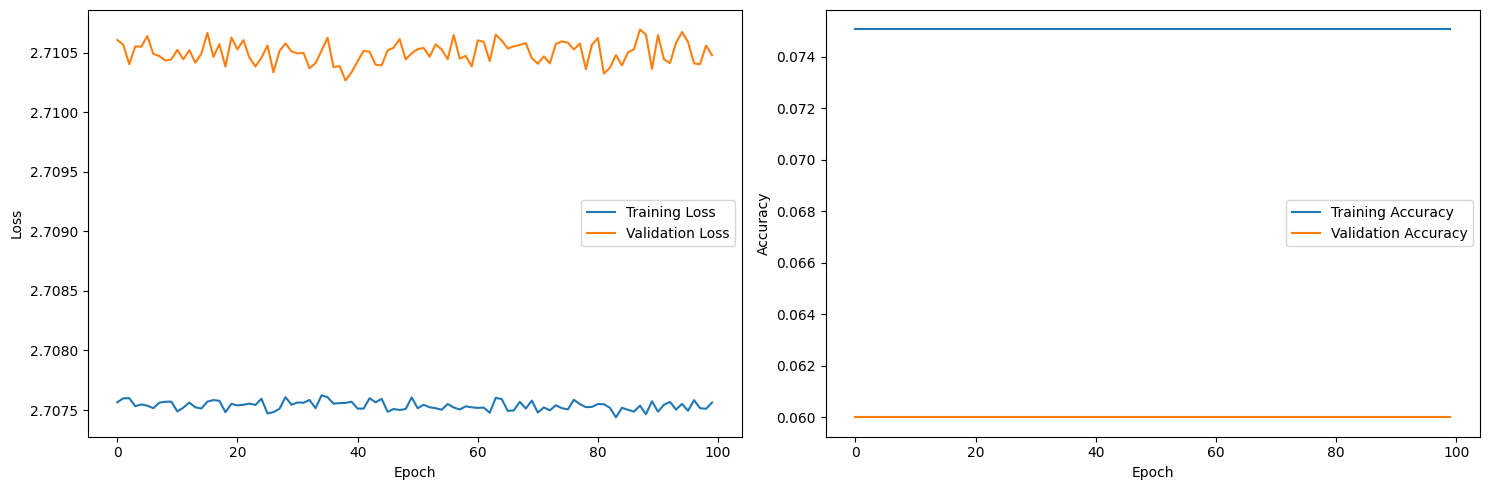

In [77]:
plot_history(model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=0))

In this model, i think i've had an issue in my system, because in the upper experiments i've faced similar situations but when i ran them again, they give good results. But i can not have enough time to rerun this model, so it gives a wrong output. :(

In [79]:
print(f"Testing Accuracy: {(get_accuracy(model2, X_test, y_test)*100):.2f}%\n")

Testing Accuracy: 5.60%



In [81]:
prediction = model.predict(X_test, steps = 20)
y_pred = np.argmax(prediction, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

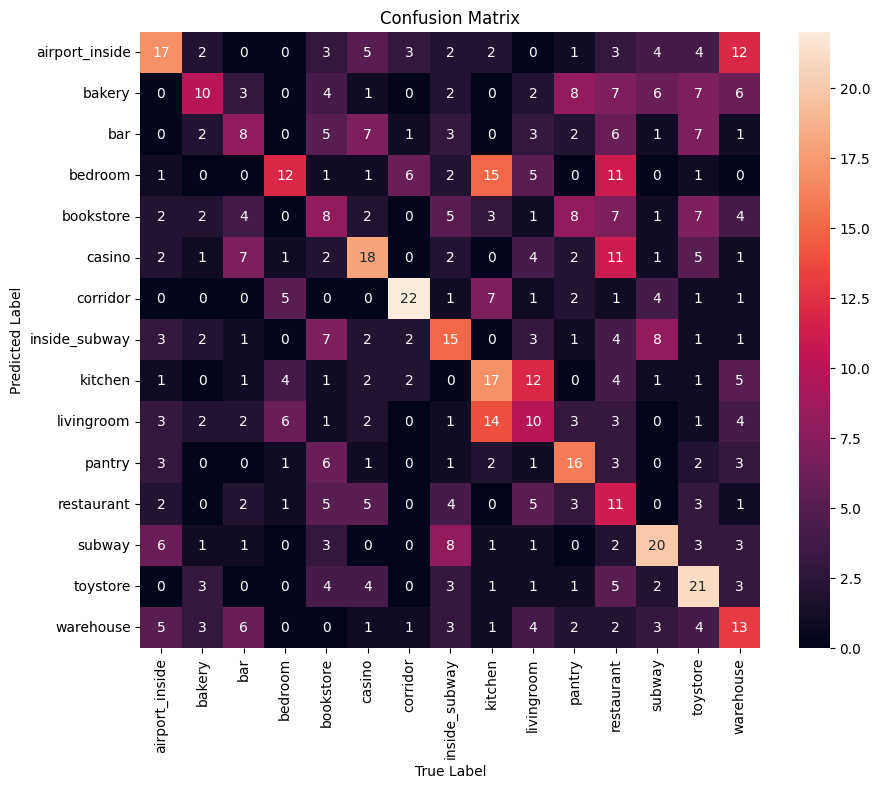

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes,yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()